<a href="https://colab.research.google.com/github/LarsBentsen/CourseDSAIStatisticalLearning/blob/main/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIDS Virus infection classification

In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Load the AIDS classification dataset

In [39]:
df = pd.read_csv('data/AIDS_Classification.csv')
print("number of rows: ", df.shape[0])
df.head()

number of rows:  2139


,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [40]:
# check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [41]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [42]:
# training and test set

np.random.seed(666)
test_indxs = np.random.choice(np.arange(df.shape[0]), size=df.shape[0] // 5, replace=False)
df_test = df.iloc[test_indxs]
df = df.drop(test_indxs)

/tmp/ipykernel_27661/2171876772.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df['infected'], bins=10, palette='viridis', kde=True)


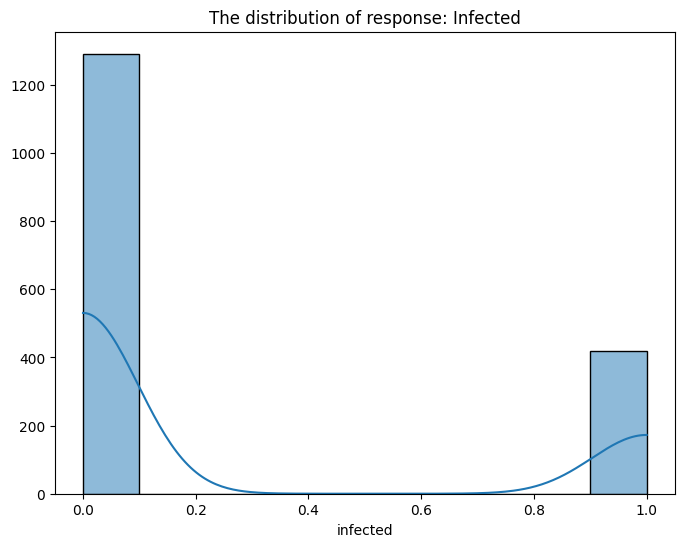

In [43]:
# look at the response: infected
plt.figure(figsize=(8,6))
sns.histplot(x=df['infected'], bins=10, palette='viridis', kde=True)
plt.title("The distribution of response: Infected")
plt.ylabel("")
plt.show()

In [46]:
# Imbalanced data
df[df['infected'] == 1].shape[0] / df[df['infected'] == 0].shape[0] 

0.32507739938080493

In [47]:
# training and test set

y_train = df['infected']
X_train = df.drop('infected',axis = 1)

y_test = df_test['infected']
X_test = df_test.drop('infected',axis = 1)

In [48]:
# scale data
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)

In [16]:
# model with Random Forest
rfc = RandomForestClassifier(n_estimators=300)
model = rfc.fit(X_train_scaled,y_train)

In [18]:
y_pred = model.predict(X_test)
accuarcy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuarcy)

Accuracy: 0.7634660421545667


/home/hennie/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [20]:
# confusion matrix
confusion_matrix(y_pred, y_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.76      1.00      0.87       326
           1       0.00      0.00      0.00       101

    accuracy                           0.76       427
   macro avg       0.38      0.50      0.43       427
weighted avg       0.58      0.76      0.66       427



/home/hennie/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hennie/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hennie/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# XGBoost

# Use "hist" for constructing the trees, with early stopping enabled.
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
# Fit the model, test sets are used for early stopping.
model = clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])


[0]	validation_0-logloss:0.42936
[1]	validation_0-logloss:0.37345
[2]	validation_0-logloss:0.33832
[3]	validation_0-logloss:0.31538
[4]	validation_0-logloss:0.30135
[5]	validation_0-logloss:0.29213
[6]	validation_0-logloss:0.28834
[7]	validation_0-logloss:0.28506
[8]	validation_0-logloss:0.28222
[9]	validation_0-logloss:0.28248
[10]	validation_0-logloss:0.28216
[11]	validation_0-logloss:0.28351
[12]	validation_0-logloss:0.28735


In [53]:
# predict model
y_pred = model.predict(X_test)
accuarcy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuarcy)

# confusion matrix
confusion_matrix(y_pred, y_test)

print(classification_report(y_test,y_pred))


Accuracy: 0.8735362997658079
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       326
           1       0.76      0.68      0.72       101

    accuracy                           0.87       427
   macro avg       0.83      0.81      0.82       427
weighted avg       0.87      0.87      0.87       427



In [ ]:
# add cross-validation